# Vermont Farm Data 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from source import Vermont_Farm
VF = Vermont_Farm()

In [2]:
from statsmodels.compat import lzip
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from stargazer.stargazer import Stargazer

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
df = pd.read_csv('./1850final.csv')

In [5]:
prices = pd.read_csv("./Hist_Firm_mathodology_table_Variable_name_final.csv")

In [6]:
# print(df.columns)
# print(prices_np[:,0])
prices.head(3)

,rown,row number,2023 price,1860 price,1850 price
0,Name,"Name of Owner, Agent, or Manager of the Farm",NaN,NaN,NaN
1,improved,Acres of Improved Land,17234.0,NaN,NaN
2,unimproved,Acres of Unimproved Land,26300.0,NaN,NaN


In [7]:
df.columns

Index(['rown', 'Name', 'improved', 'unimproved', 'cash_val', 'machine_val',
       'horse', 'mules', 'milkcow', 'oxen', 'cattle', 'sheep', 'swine',
       'livestock_val', 'wheat', 'rye', 'corn', 'oats', 'rice', 'tobacco',
       'cotton', 'wool', 'peas', 'potatos', 'sweetpotatos', 'barley',
       'buckwheat', 'orchid_val', 'wine', 'produce_val', 'butter', 'cheese',
       'hay', 'clover', 'other_grass', 'hops', 'hemp_dewrot', 'hemp_waterrot',
       'flax', 'flaxseed', 'silk', 'maplesugar', 'canesugar', 'molasses',
       'beewax', 'manufactures_val', 'animals_val', 'pg_num', 'year', 'town'],
      dtype='object')

In [8]:
prices=prices.drop(45, axis=0) # drop row 'honey' since it's not in 1850.csv
prices=prices.fillna(0)
df_np = df.to_numpy()
prices_np = prices.to_numpy()

In [9]:
df_np = df.convert_dtypes(convert_string=np.nan)
# df_np.dtypes
df_np = df_np.to_numpy()
print(df_np.shape)
print(prices_np[:,2].shape)
print(df_np[0,:].shape)
df_np[:,1]=0 # replace the name column (string) with zero
df_np[:,49]=0 # replace the town column (string) with zero

(170, 50)
(50,)
(50,)


In [10]:
# print(prices_np[:,2]) # this is 2023 price
print(prices_np[:,3]) # this is 1860 price
print(prices_np[:,4]) # this is 1850 price 

[0.0 0.0 0.0 0.0 0.0 59.0 59.0 0.0 0.0 0.0 0.0 0.0 0.0 1.495 0.77 0.46
 0.34 0.0232 8.6 0.11 1.025 0.73 0.37 0.48 0.58 0.52 0.0 2.12 0.0 0.29 0.0
 8.76 0.0 0.0 0.09 67.0 67.0 67.0 0.057 1.15 0.0 0.123 0.151 27.3 0.0 0.0
 0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0 0.0 44.0 44.0 0.0 0.0 0.0 0.0 0.0 0.0 1.275 0.7 0.4 0.34
 0.0182 9.8 0.123 0.833 0.88 0.37 0.48 0.72 0.46 0.0 2.75 0.0 0.29 0.0
 7.58 0.0 0.0 0.1 90.0 90.0 90.0 0.06 1.15 0.0 0.093 0.09 22.1 0.0 0.0 0.0
 0.0 0.0 0.0]


In [11]:
df['total_output'] = df_np @ prices_np[:,4]
df["revenue_per_land"] = df['total_output'] / df['improved']

In [12]:
fifty_price = prices_np[:,4].reshape(-1,1)

# generate entropy score

In [13]:
mylist = [] 
output = df_np @ prices_np[:,4] 
for j in range(df_np.shape[0]):
    row = df_np[j, :].reshape(1,-1)
    mat = fifty_price @ row
    P = np.diag(mat)
    P = P[P != 0]
    share = P/output[j]
    share = share.reshape(-1) # make it 1 D 
    inv_share = 1/(share)
    inv_share = inv_share.astype(float)
    log_inv_share = np.log(inv_share)
    log_inv_share = log_inv_share.reshape(1,-1) # make it a row
    score = log_inv_share @ share
    mylist.append(score)

In [14]:
mylist = np.array(mylist)

In [15]:
mylist = mylist.reshape(-1)

In [16]:
print(mylist)

[0.5941371978469214 0.9480424435205859 0.982475000784206
 0.6886520342048142 0.7940285227676245 0.7495390286402827
 0.769830808863383 0.378667751491338 0.5673689928718751 0.5538705484133852
 0.6020521174146936 0.7925907431988686 0.74912304681226 0.6310268437714966
 0.8248596175129594 0.18378459580280648 1.2085971653434433
 0.9634373032324123 0.6018553774960069 0.5399755685710977
 0.6373079530652378 0.6665919506060914 0.706170425239103
 0.9898533216315776 0.436100480482254 0.2221444260692329
 0.41247440808071245 0.7498241576172268 0.5428938315795335
 1.0402238105593131 0.4201581311604498 0.8339149261960844
 0.8232943126147705 0.8620550809179492 0.8721917606489042
 0.899493392297178 0.9026137202686421 0.4503519899793368
 0.8928188768874942 0.7454780798636085 0.7517981680505523
 1.0881974022089356 0.8902810401074019 0.49633620292583286
 0.7718341273003048 1.3824636721548098 1.3564606689645409
 0.8983198590086897 1.1800506578479415 0.6605866879180606
 0.8109707218924174 0.6687424402076738 

In [17]:
df["entropy_score"] = mylist

# generate Herfindahl index

In [18]:
fifty_price = prices_np[:,4].reshape(-1,1)

list2 = [] 
output = df_np @ prices_np[:,4] 
for j in range(df_np.shape[0]):
    row = df_np[j, :].reshape(1,-1)
    mat = fifty_price @ row
    P = np.diag(mat)
    P = P[P != 0]
    share = P/output[j]
    share = share.reshape(-1) # make it 1 Dimension vector
    sq_share = np.square(share) 
    score = sq_share.sum() 
    H = 1 - score
    list2.append(H)
list2 = np.array(list2)
list2 = list2.reshape(-1)
print(list2)

[0.27877678 0.48291358 0.45994924 0.33887418 0.43663514 0.3197713
 0.34302358 0.14942085 0.25092613 0.21225527 0.25658514 0.37741029
 0.35793731 0.29737368 0.38347859 0.06717735 0.65164195 0.46583973
 0.26230877 0.209368   0.27721593 0.26481617 0.30741531 0.49579103
 0.17982607 0.08524393 0.15756953 0.32563225 0.22626319 0.52913605
 0.17415578 0.46785265 0.42498249 0.37791187 0.46075697 0.41179712
 0.42675269 0.18461823 0.50286428 0.33085614 0.42252309 0.59604559
 0.417572   0.20985998 0.41661328 0.69489845 0.6873963  0.42534263
 0.55415617 0.26666313 0.38319557 0.30592536 0.58187467 0.2710808
 0.44518618 0.31019528 0.30788209 0.5880975  0.16294654 0.55867054
 0.45508128 0.49954276 0.19108412 0.34710972 0.2479488  0.28712544
 0.62443694 0.68247702 0.62960603 0.19719593 0.39925297 0.32533867
 0.21823109 0.25042175 0.35703799 0.44397545 0.52132279 0.58258249
 0.510375   0.29981523 0.60421388 0.34296829 0.47927556 0.48447066
 0.16793149 0.2224387  0.58390864 0.57137564 0.55261392 0.804887

In [19]:
df["herfindahl_score"] = list2 

### generated diversification score, entropy score, `revenue_per_land`, dependent variable is still TFP

In [20]:
# df.to_csv('1850final_w_TotalOutput.csv')
# df = pd.read_csv('./1850final_w_TotalOutput.csv')
# df.to_stata('1850final_w_TotalOutput.dta')

# Regression that generate TFP

In [21]:
from source import Vermont_Farm
VF = Vermont_Farm()
# df = pd.read_csv('./1850final_w_TotalOutput.csv')

In [22]:
# df['total_output'] = df['total_output'] / 38.7
# df = df.drop('total_output', axis=1)

* L: land, improved and unimproved
* K: capital, cash_val, machine_val, livestock_val
* Labor: Human Labor, not known. Animal labor: horse, mules, milkcow

In [23]:
cols=['improved', 'unimproved', 
      'cash_val', 'machine_val', 
      'horse', 'mules', 'milkcow']
np_cols = np.array(cols)
np_cols = np_cols.reshape(-1)
length = np_cols.shape[0]
beta = 1/length
print(beta)

0.14285714285714285


In [24]:
# Don't need beta
for col in cols:
    df[f'log_{col}'] = np.log(df[col].to_numpy() + 1)

In [25]:
y = df['total_output']
y = y.to_numpy().astype(float)
log_y = np.log(y)
df['log_total_output'] = log_y 

In [26]:
mycols=['improved', 'unimproved', 
      'cash_val', 'machine_val', 
      'horse', 'mules', 'milkcow']
def process(cols):
    log_cols = []
    for col in cols:
        col = f"log_{col}"
        log_cols.append(col)
    return log_cols 
log_cols = process(cols=mycols)

In [27]:
print(log_cols)
print(type(log_cols))

['log_improved', 'log_unimproved', 'log_cash_val', 'log_machine_val', 'log_horse', 'log_mules', 'log_milkcow']
<class 'list'>


In [28]:
SMF_ols = smf.ols(formula='log_total_output ~ log_improved + log_unimproved + log_cash_val + log_machine_val + log_horse + log_mules + log_milkcow', data=df).fit()
print(SMF_ols.summary())

                            OLS Regression Results                            
Dep. Variable:       log_total_output   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     177.1
Date:                Sat, 20 May 2023   Prob (F-statistic):           1.70e-72
Time:                        15:58:14   Log-Likelihood:                -31.726
No. Observations:                 170   AIC:                             79.45
Df Residuals:                     162   BIC:                             104.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.1333      0.256     

In [29]:
reg = LinearRegression().fit(df[log_cols], log_y)

In [30]:
print(reg.score(df[log_cols],log_y))

0.8844340001417423


# return to scale

In [31]:
# confirm that this gives the same results as the regression table above.
print(reg.coef_)
# sum coefficient
print(f"the sum of the coefficients is: {reg.coef_.sum()}")
print(f"the intercept is: {reg.intercept_}")

[ 0.1081955   0.01314516  0.05777031  0.64545768  0.11422005 -0.07463236
  0.34716724]
the sum of the coefficients is: 1.211323576221687
the intercept is: 4.13328689023676


In [32]:
# df = df.drop("reg_predict", axis=1, inplace=True)

In [33]:
df['log_reg_predict'] = reg.predict(df[log_cols])
# df['log_total_output'] = log_y 
df['reg_predict'] = np.exp(df['log_reg_predict'].to_numpy())
df['total_output'] = np.exp(df['log_total_output'].to_numpy())

In [34]:
df.columns

Index(['rown', 'Name', 'improved', 'unimproved', 'cash_val', 'machine_val',
       'horse', 'mules', 'milkcow', 'oxen', 'cattle', 'sheep', 'swine',
       'livestock_val', 'wheat', 'rye', 'corn', 'oats', 'rice', 'tobacco',
       'cotton', 'wool', 'peas', 'potatos', 'sweetpotatos', 'barley',
       'buckwheat', 'orchid_val', 'wine', 'produce_val', 'butter', 'cheese',
       'hay', 'clover', 'other_grass', 'hops', 'hemp_dewrot', 'hemp_waterrot',
       'flax', 'flaxseed', 'silk', 'maplesugar', 'canesugar', 'molasses',
       'beewax', 'manufactures_val', 'animals_val', 'pg_num', 'year', 'town',
       'total_output', 'revenue_per_land', 'entropy_score', 'herfindahl_score',
       'log_improved', 'log_unimproved', 'log_cash_val', 'log_machine_val',
       'log_horse', 'log_mules', 'log_milkcow', 'log_total_output',
       'log_reg_predict', 'reg_predict'],
      dtype='object')

In [35]:
df['log_TFP'] = df['log_total_output'] - df['log_reg_predict']

In [36]:
# df['TFP'] = np.exp(df['log_TFP'].to_numpy())
df['TFP'] = df['total_output'] - df['reg_predict']

# Gen `1850final_w_TFP.csv`

In [37]:
df.to_csv('1850final_w_TFP.csv')
# df.to_stata('1850final_w_TFP.dta')

In [38]:
print(df['TFP'].max())
print(df['TFP'].min())

16933.962098482036
-5225.30735126135


In [39]:
# df['TFP_label'] = pd.cut(x=df['TFP'], bins=[-5000, -4000, -2000, -1000, 0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000])

### Regression that have TFP as the dependent variable
we run a linear regression with `cols2`.

In [40]:
df = pd.read_csv('./1850final_w_TFP.csv')
tfp = df['TFP']
# df = df.drop('TFP', axis=1)
cols2 = ['improved', 
         "oxen", "livestock_val", "animals_val", 
         "wool", "manufactures_val", "produce_val"]

In [41]:
reg2 = LinearRegression().fit(df[cols2],tfp)

In [42]:
reg2.score(df[cols2],tfp)

0.11254078159876657

In [43]:
print(reg2.coef_)
print(reg2.intercept_)

[-3.85259313 68.03422808  2.93976781  1.93311321 -0.80631842 -8.15965676
  0.        ]
-645.2946548926477


In [44]:
# reg2.predict(df[cols2])
# y2 = 1 means productive, y2 = 0 means not productive
y2 = 1*(tfp>0)

In [45]:
# negative TFP encode as 0
# positive TFP encode as 1 
# print(y2.shape)
print(tfp.shape)
# print(tfp)
print("***")
# print(y2)
print(f"the mean of y2 is: {y2.mean()}")
df['binary_TFP'] = y2

(170,)
***
the mean of y2 is: 0.38235294117647056


# generate `1850final_w_TotalOutput.csv` with `binary_TFP`

In [46]:
df.to_csv('1850final_w_TotalOutput.csv')
df.to_stata('1850final_w_TotalOutput.dta')

/tmp/ipykernel_2264/213687065.py:2: InvalidColumnName: 
Not all pandas column names were valid Stata variable names.
The following replacements have been made:

    Unnamed: 0   ->   Unnamed__0

If this is not what you expect, please make sure you have Stata-compliant
column names in your DataFrame (strings only, max 32 characters, only
alphanumerics and underscores, no Stata reserved words)

  df.to_stata('1850final_w_TotalOutput.dta')


In [47]:
smf_logit = smf.logit('binary_TFP ~ improved + livestock_val + animals_val + machine_val + horse', data = df).fit()
print(smf_logit.summary())
cols3 = ['improved', 
         "livestock_val", "animals_val", 
         "machine_val" , "horse"]

Optimization terminated successfully.
         Current function value: 0.618199
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             binary_TFP   No. Observations:                  170
Model:                          Logit   Df Residuals:                      164
Method:                           MLE   Df Model:                            5
Date:                Sat, 20 May 2023   Pseudo R-squ.:                 0.07066
Time:                        15:58:15   Log-Likelihood:                -105.09
converged:                       True   LL-Null:                       -113.08
Covariance Type:            nonrobust   LLR p-value:                  0.006896
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.8511      0.292     -2.913      0.004      -1.424      -0.278
improved         -0.

In [48]:
# make an instance of the model and fit to data
Reg_logit = LogisticRegression().fit(df[cols3], y2)

In [49]:
print(f"our accuracy is: {Reg_logit.score(df[cols3], y2)}")

our accuracy is: 0.6764705882352942


In [50]:
print(f"the coefficients are: {Reg_logit.coef_}")
print(f"the intercept is: {Reg_logit.intercept_}")

the coefficients are: [[-0.01078255  0.00343089 -0.00309309  0.00437672 -0.16249906]]
the intercept is: [-0.85295411]


In [51]:
from sklearn.metrics import classification_report

In [52]:
logit_predicted = Reg_logit.predict(df[cols3])
# print(classification_report(y2,logit_predicted))

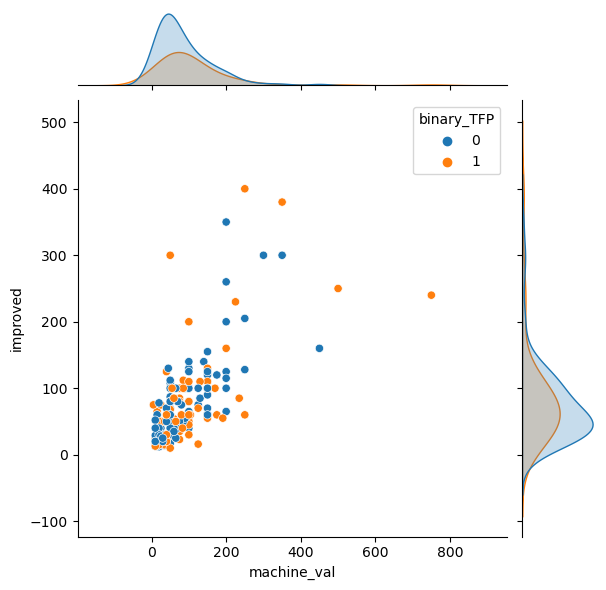

In [53]:
sns.jointplot(data=df, x='machine_val', y='improved', hue="binary_TFP")

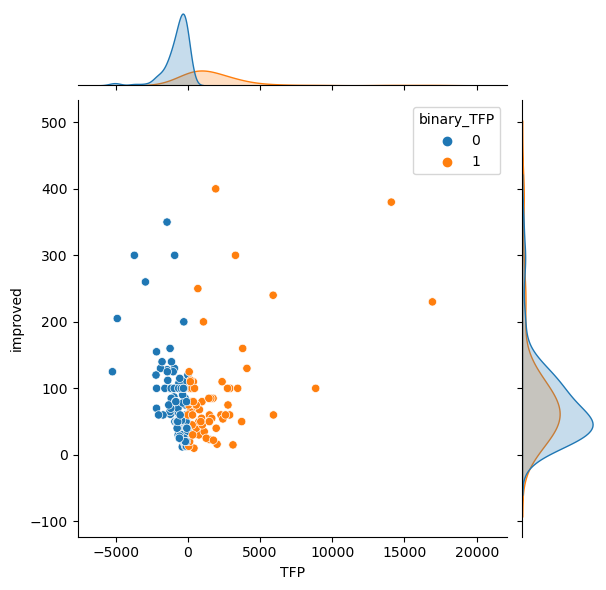

In [54]:
sns.jointplot(data=df, x='TFP', y='improved', hue="binary_TFP")

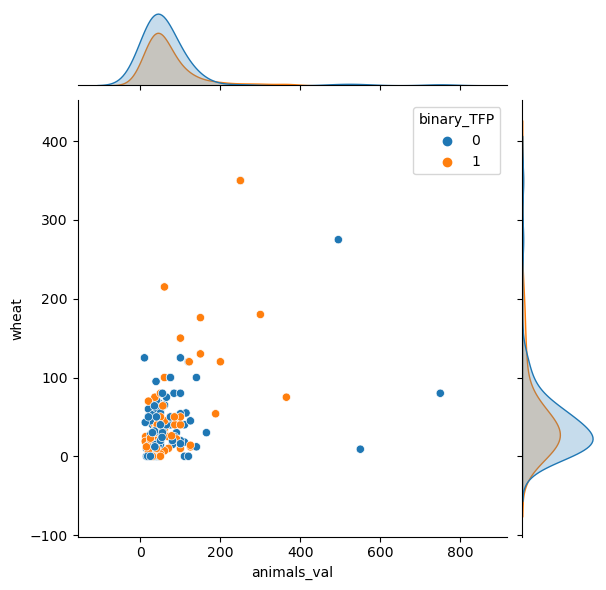

In [55]:
sns.jointplot(data=df, x='animals_val', y='wheat', hue="binary_TFP")

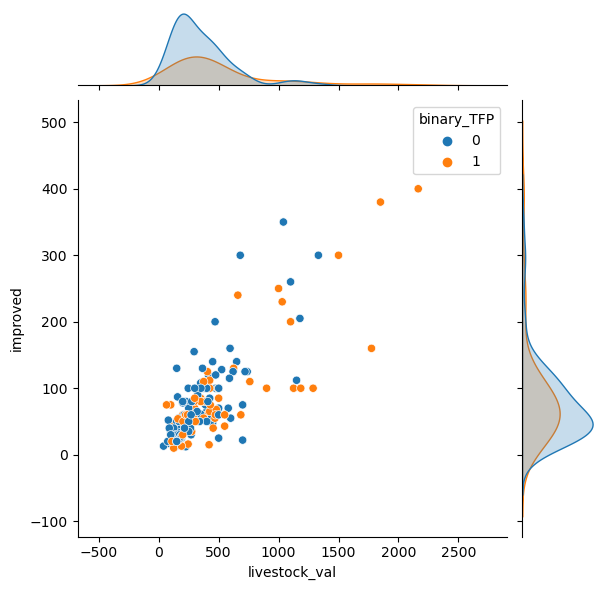

In [56]:
sns.jointplot(data=df, x='livestock_val', y='improved', hue="binary_TFP")

### generate diversification score, use as a regressor, dependent variable is still TFP
This section is moved to the diversification.ipynb

In [57]:
df3 = pd.read_csv('./1850final_w_TotalOutput.csv')

In [58]:
# sns.scatterplot(data=df3, x="diversity_score", y="improved")
# sns.scatterplot(data=df3, x="diversity_score", y="TFP")

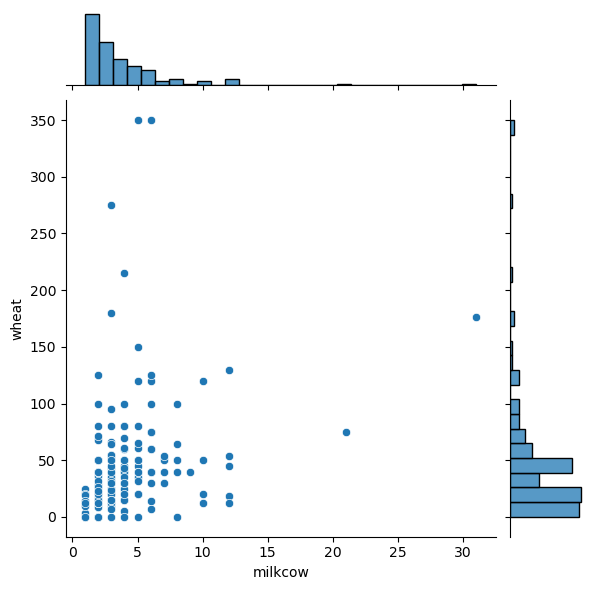

In [59]:
sns.jointplot(data=df3, x="milkcow", y="wheat")